In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf

## Read data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,idx,balancing
0,0,0,1.30
1,1,1,2.00
2,2,2,1.60
3,3,3,1.55
4,4,4,2.00


<AxesSubplot:>

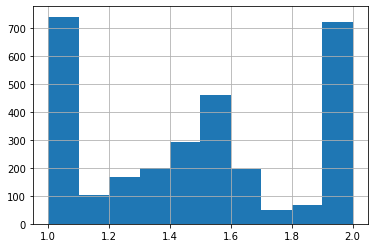

In [3]:
data["balancing"].hist()

In [4]:
data[data["balancing"] == 1.5].count()

Unnamed: 0    340
idx           340
balancing     340
dtype: int64

In [5]:
data["balancing1"] = data["balancing"] - 1

In [17]:
path_maps = "gen_maps"
SIZE = 8
BORDER = 6
X = []
for folder in os.listdir(path_maps):
    m = np.load(os.path.join(path_maps, folder, "map.npy"))
    b = BORDER + 1
    s = b+SIZE - 2
    m = (m[b:s, b:s] -1) / 10
    X.append(m)

In [7]:
X[15]

array([[0.1, 0.4, 0.4, 0.1, 0.1, 0.8],
       [0.1, 0.3, 0.1, 0.3, 0. , 0.8],
       [0.4, 0.1, 0.1, 0.3, 0.4, 0.8],
       [0.8, 0.1, 0.4, 0.4, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.4, 0. , 0.1],
       [0.8, 0.1, 0.1, 0.1, 0.1, 0.1]])

## Training

In [18]:
y = tf.convert_to_tensor(data["balancing1"])
X = tf.convert_to_tensor(X)
#X = tf.expand_dims(X, axis=1)

In [19]:
split = int(len(X) * 0.8)
y_train = y[:split]
y_test = y[split:]
X_train = X[:split]
X_test = X[split:]

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((6,6)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6, 16)             112       
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                1552      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 0s 786us/step - loss: 0.1351
Epoch 2/100
75/75 [==============================] - 0s 802us/step - loss: 0.1338
Epoch 3/100
75/75 [=

75/75 [==============================] - 0s 767us/step - loss: 0.0870
Epoch 89/100
75/75 [==============================] - 0s 772us/step - loss: 0.0871
Epoch 90/100
75/75 [==============================] - 0s 798us/step - loss: 0.0863
Epoch 91/100
75/75 [==============================] - 0s 731us/step - loss: 0.0857
Epoch 92/100
75/75 [==============================] - 0s 749us/step - loss: 0.0858
Epoch 93/100
75/75 [==============================] - 0s 744us/step - loss: 0.0849
Epoch 94/100
75/75 [==============================] - 0s 794us/step - loss: 0.0848
Epoch 95/100
75/75 [==============================] - 0s 743us/step - loss: 0.0839
Epoch 96/100
75/75 [==============================] - 0s 759us/step - loss: 0.0844
Epoch 97/100
75/75 [==============================] - 0s 739us/step - loss: 0.0836
Epoch 98/100
75/75 [==============================] - 0s 758us/step - loss: 0.0834
Epoch 99/100
75/75 [==============================] - 0s 774us/step - loss: 0.0828
Epoch 100/100
75/

In [239]:
X.shape

TensorShape([300, 6, 6])

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((6,6, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 dense_6 (Dense)             (None, 2, 2, 1)           33        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 0s 997us/step - loss: 0.1341
Epoch 2/100
75/75 [==============================] - 0s 942us/step - loss: 0.1339
Epoch 3/100
75/75 [==============================] - 0s 959us/step - loss: 0.1341
Epoch 4/

75/75 [==============================] - 0s 939us/step - loss: 0.1337
Epoch 90/100
75/75 [==============================] - 0s 911us/step - loss: 0.1338
Epoch 91/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1338
Epoch 92/100
75/75 [==============================] - 0s 922us/step - loss: 0.1338
Epoch 93/100
75/75 [==============================] - 0s 946us/step - loss: 0.1337
Epoch 94/100
75/75 [==============================] - 0s 908us/step - loss: 0.1337
Epoch 95/100
75/75 [==============================] - 0s 925us/step - loss: 0.1338
Epoch 96/100
75/75 [==============================] - 0s 931us/step - loss: 0.1338
Epoch 97/100
75/75 [==============================] - 0s 910us/step - loss: 0.1338
Epoch 98/100
75/75 [==============================] - 0s 895us/step - loss: 0.1338
Epoch 99/100
75/75 [==============================] - 0s 986us/step - loss: 0.1338
Epoch 100/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1338


In [28]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 833us/step - loss: 0.1403


0.14025883376598358

In [29]:
pd.DataFrame(abs(model.predict(X_test) - y_test)[0]).plot.hist()

19/19 [==============================] - 0s 746us/step


ValueError: Must pass 2-d input. shape=(2, 2, 600)

In [23]:
i = 5
print(model.predict(tf.expand_dims(X_test[i], axis=0))[0][0])
print(y_test[i])

1/1 [==============================] - 0s 14ms/step
0.0222306
tf.Tensor(1.0, shape=(), dtype=float64)


In [24]:
y_test[0]

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [25]:
tf.expand_dims(X_test[0], axis=1)

<tf.Tensor: shape=(6, 1, 6), dtype=float64, numpy=
array([[[0.1, 0.4, 0.4, 0.6, 0. , 0.4]],

       [[0.4, 0.1, 0.1, 0. , 0.1, 0.8]],

       [[0.3, 0.8, 0. , 0.4, 0. , 0.1]],

       [[0.1, 0. , 0.1, 0.1, 0.8, 0.1]],

       [[0.1, 0.4, 0.8, 0.4, 0.1, 0.1]],

       [[0.1, 0.1, 0.3, 0.4, 0.4, 0.1]]])>